***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [99]:
df = pd.read_csv('../parte 1/dados.csv')

### Visualize o conteúdo do DataFrame

In [100]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.


#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

<b>A</b> ► > 19.700

<b>B</b> ► De 11.820 a 19.700

<b>C</b> ► De 3.940 a 11.820

<b>D</b> ► De 1.576 a 3.940

<b>E</b> ► Até 1.576

In [101]:
df['Renda'].max()

200000

In [102]:
df['Renda'].min()

0

In [103]:
classes = [0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [104]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [105]:
frequencia_renda = pd.value_counts(
    pd.cut(
        x = df['Renda'],
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)
frequencia_renda

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [106]:
porcentagem_renda = pd.value_counts(
    pd.cut(
        x = df['Renda'],
        bins = classes,
        labels = labels,
        include_lowest = True
    ),
    normalize = True 
) * 100
porcentagem_renda

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [107]:
distribuicao_freq_quantitativas = pd.DataFrame({'Frquência': frequencia_renda, 'Porcentagem': porcentagem_renda})
distribuicao_freq_quantitativas.sort_index(ascending=False, inplace = True)
distribuicao_freq_quantitativas

,Frquência,Porcentagem
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


In [108]:
distribuicao_freq_quantitativas.rename_axis('Classes', axis='columns', inplace = True)
distribuicao_freq_quantitativas

Classes,Frquência,Porcentagem
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

array([[<Axes: title={'center': 'Frquência'}>,
        <Axes: title={'center': 'Porcentagem'}>]], dtype=object)

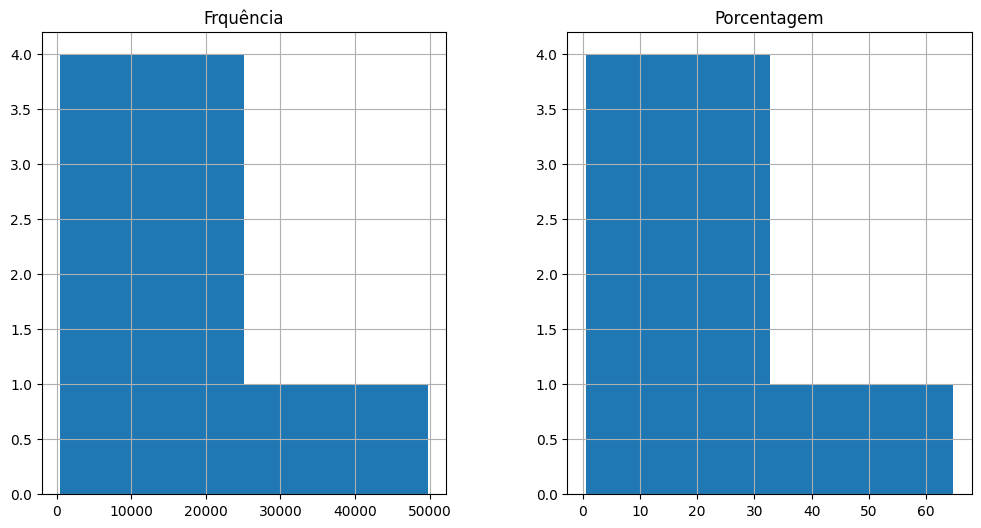

In [109]:
distribuicao_freq_quantitativas.hist(bins = 2, figsize = (12,6))

> ### Conclusões

Escreva suas conclusões aqui...

A maioria da população estava sobrevivendo com salarios bem proximo do minimo o que já é de se esperar

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [110]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<Axes: title={'center': 'Histograma - Altura'}, xlabel='Metros', ylabel='Count'>

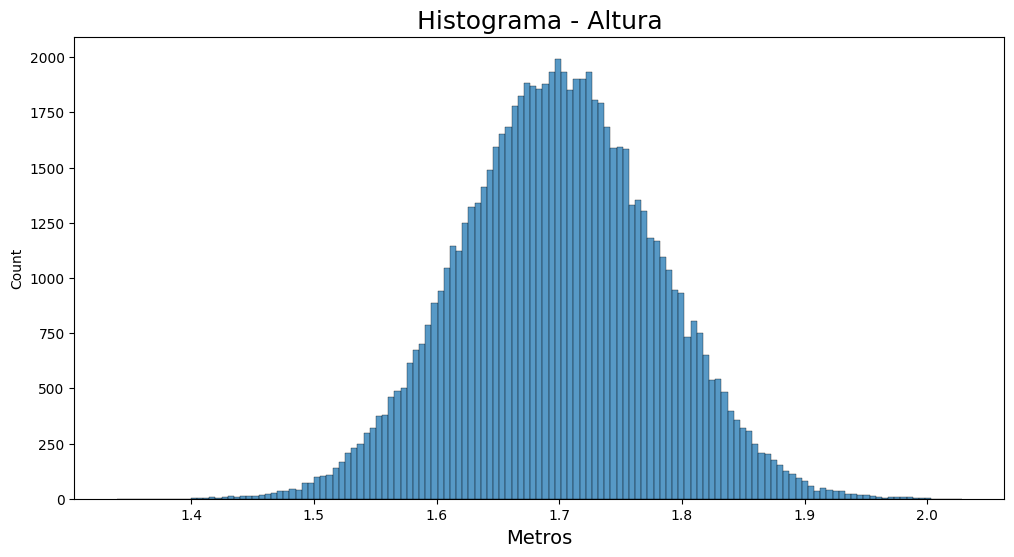

In [111]:
ax = sns.histplot(df.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma - Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax

<Axes: title={'center': 'Histograma - Renda'}, xlabel='Renda', ylabel='Count'>

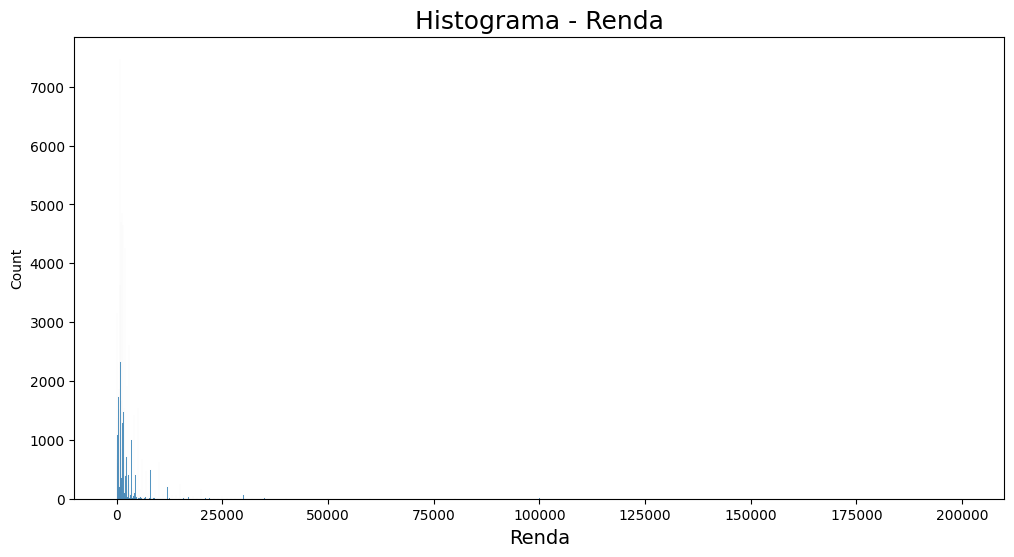

In [112]:
ax = sns.histplot(x = df['Renda'], kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma - Renda', fontsize = 18)
ax.set_xlabel('Renda', fontsize = 14)
ax


<Axes: title={'center': 'Histograma - Idade'}, xlabel='Idade', ylabel='Count'>

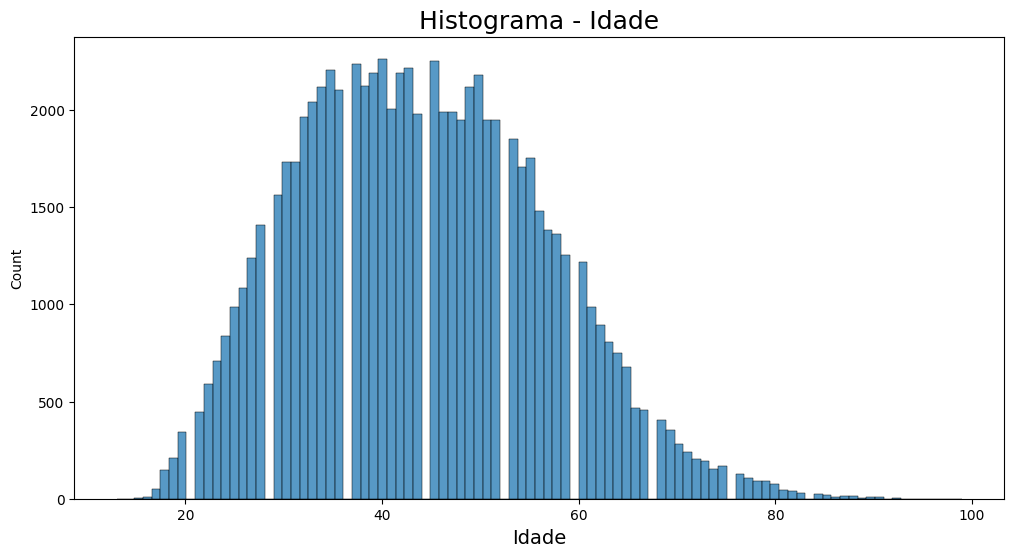

In [113]:
ax = sns.histplot(df.Idade)

ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma - Idade', fontsize = 18)
ax.set_xlabel('Idade', fontsize = 14)
ax

> ### Conclusões

Escreva suas conclusões aqui...

<br>Observando os gráficos percebemos que a Renda está com uma assimetria à direita muito grande</br>
<br>Também é perceptivel que a Altura está simetrica</br>
<br>A idade também está com uma assimetria à direita, mas não tão grande quanto a Renda</br>

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<Axes: title={'center': 'Histograma - Idade'}, xlabel='Idade', ylabel='Count'>

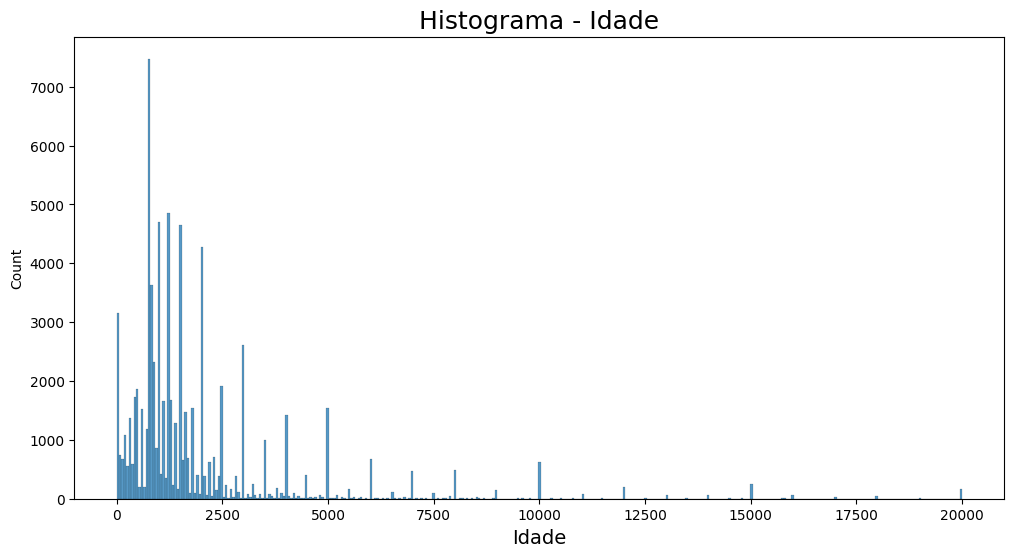

In [114]:
ax = sns.histplot(x = 'Renda', data = df.query('Renda <= 20000'))

ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma - Idade', fontsize = 18)
ax.set_xlabel('Idade', fontsize = 14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [115]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [116]:
frequencia_cross_sexo_cor = pd.crosstab(df.Sexo, df.Cor)
frequencia_cross_sexo_cor.rename(index= sexo, inplace = True)
frequencia_cross_sexo_cor.rename(columns= cor, inplace = True)

In [117]:
frequencia_cross_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


> ### Conclusões

Escreva suas conclusões aqui...

A maioria dos provedores das familias são da cor Parda e Branca 



## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [118]:
df['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [119]:
df['Renda'].median()

1200.0

### Obtenha a moda

In [120]:
df['Renda'].mode()[0]

788

### Obtenha o desvio médio absoluto

In [121]:
dma = (df['Renda'] - df['Renda'].mean()).abs().mean()
dma

1526.4951371638058

### Obtenha a variância

In [122]:
df['Renda'].var()

11044906.006217021

### Obtenha o desvio-padrão

In [123]:
df['Renda'].std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [124]:
renda_por_sexo_cor = pd.crosstab(df.Sexo, df.Cor,
                                   aggfunc = ['mean', 'median', 'max'], values = df.Renda)

renda_por_sexo_cor.rename(index = sexo, inplace = True)
renda_por_sexo_cor.rename(columns = cor, inplace = True)
renda_por_sexo_cor.rename(columns = {'mean': 'Média', 'median': 'Mediana', 'max': 'Máximo'}, inplace = True)

renda_por_sexo_cor


Média                                                      \
Cor           Indígena       Branca        Preta      Amarela        Parda   
Sexo                                                                         
Masculino  1081.710938  2925.744435  1603.861687  4758.251064  1659.577425   
Feminino   2464.386139  2109.866750  1134.596400  3027.341880  1176.758516   

           Mediana                                   Máximo                 \
Cor       Indígena  Branca   Preta Amarela   Parda Indígena  Branca  Preta   
Sexo                                                                         
Masculino    797.5  1700.0  1200.0  2800.0  1200.0    10000  200000  50000   
Feminino     788.0  1200.0   800.0  1500.0   800.0   120000  100000  23000   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino   50000  100000  
Feminino    20000   30000

> ### Conclusões

Escreva suas conclusões aqui...

<br>Os indígenas estão com os menores salários tanto homens e mulheres em contra partida</br> 
<br>As pessoas da raça Amarela em maioria recebem os melhores salário seguidos pelos Brancos</br>

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [145]:
dispercao_renda_por_sexo_cor = pd.crosstab(df['Cor'], 
                                           df['Sexo'],
                                           aggfunc = {'var', 'std'}, 
                                           values = df['Renda']).round()

dispercao_renda_por_sexo_cor.rename(index = cor, inplace = True)
dispercao_renda_por_sexo_cor.rename(columns = sexo, inplace = True)
dispercao_renda_por_sexo_cor.rename(columns = {'var': 'Variância', 'std': 'Desvio Padrão'}, inplace = True)

dispercao_renda_por_sexo_cor

Desvio Padrão            Variância             
Sexo         Masculino Feminino   Masculino     Feminino
Cor                                                     
Indígena        1204.0  11957.0   1449841.0  142981765.0
Branca          4751.0   3251.0  22570023.0   10569087.0
Preta           1936.0   1350.0   3749294.0    1821960.0
Amarela         5741.0   3731.0  32957070.0   13921657.0
Parda           2312.0   1596.0   5345747.0    2547960.0

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Box-plot da RENDA por SEXO e COR'}, xlabel='R$', ylabel='Cor'>

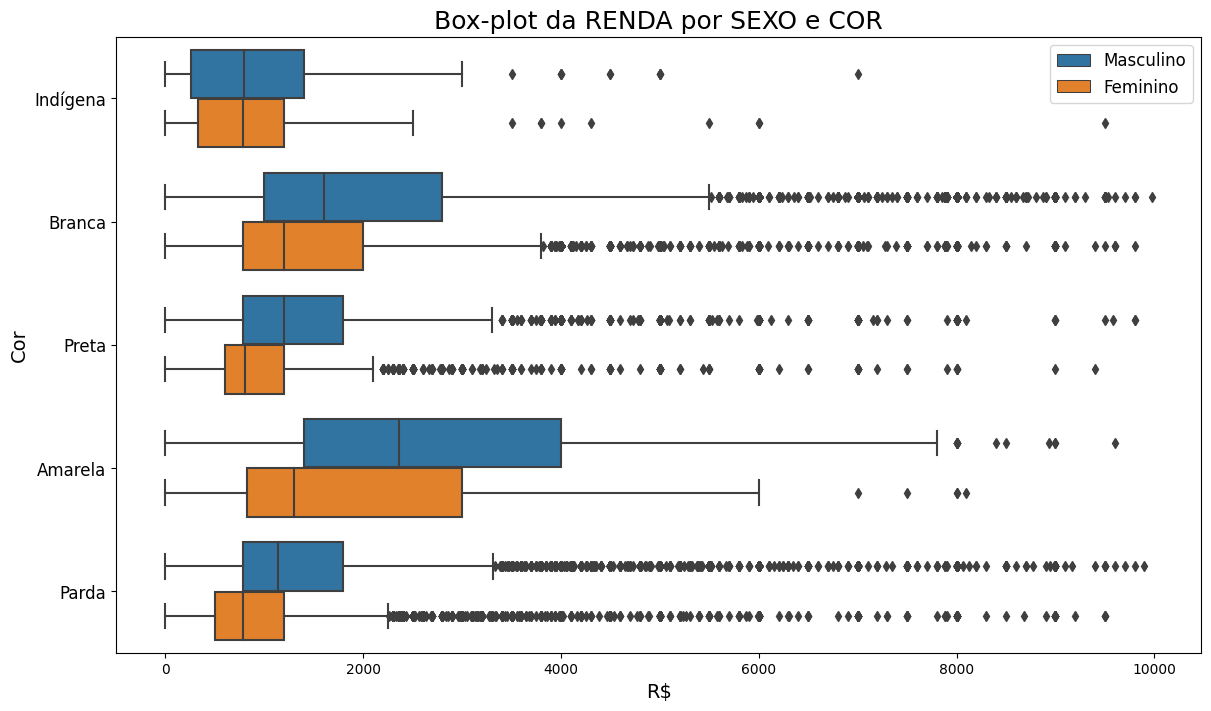

In [126]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=df.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...
- A depender do sexo e da cor da pessoa ela está tendo os melhores salarios homens da cor amarela detem os melhores salários

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [127]:
from scipy import stats
porcentagem = stats.percentileofscore(df['Renda'], 788, kind = 'weak')
print(f'{porcentagem:.2f}%')

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [128]:
valor = df.Renda.quantile(0.99)
print(f'R$ {valor:.2f}')

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [129]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [130]:
renda_por_anos_de_estudo_e_sexo = pd.crosstab(df['Anos de Estudo'], df['Sexo'],
                                              aggfunc = ['mean', 'median', 'max', 'std'], values = df['Renda']).round(2)
renda_por_anos_de_estudo_e_sexo.rename(index = anos_de_estudo, inplace = True)
renda_por_anos_de_estudo_e_sexo.rename(columns= sexo, inplace = True)
renda_por_anos_de_estudo_e_sexo.rename(columns = {'mean': 'Média', 'median': 'Mediana', 'max': 'Renda de Maior Valor', 'std': 'Desvio padrão'}, inplace = True)

renda_por_anos_de_estudo_e_sexo


Média            Mediana           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano    799.49   516.20       700      390   
1 ano                             895.63   492.77       788      400   
2 anos                            931.18   529.91       788      450   
3 anos                           1109.20   546.85       800      500   
4 anos                           1302.33   704.28      1000      788   
5 anos                           1338.65   781.39      1045      788   
6 anos                           1448.88   833.73      1200      788   
7 anos                           1465.50   830.75      1200      788   
8 anos                           1639.40   933.62      1300      800   
9 anos                           1508.04   868.02      1200      788   
10 anos                          1731.27   925.92      1218      800   
11 anos                          2117.06  1286.79      1500     1000   
12 anos                          2470.33  1682.31      1800     1200   
13 anos                          3195.10  1911.73      2400     1300   
14 anos                          3706.62  2226.46      2500     1600   
15 anos ou mais                  6134.28  3899.51      4000     2800   
Não determinados                 1295.76   798.17      1200      788   

                               Renda de Maior Valor          Desvio padrão  \
Sexo                                      Masculino Feminino     Masculino   
Anos de Estudo                                                               
Sem instrução e menos de 1 ano                30000    10000       1023.90   
1 ano                                         30000     2000       1331.95   
2 anos                                        40000     4000       1435.17   
3 anos                                        80000     3500       2143.80   
4 anos                                        50000    10000       1419.82   
5 anos                                        35000     8000       1484.65   
6 anos                                        25000     6000       1476.63   
7 anos                                        40000     9000       1419.71   
8 anos                                        30000    18000       1515.58   
9 anos                                        60000    20000       2137.66   
10 anos                                       45000     6000       2078.61   
11 anos                                      200000   100000       2676.54   
12 anos                                       30000   120000       2268.08   
13 anos                                       25000    20000       2797.12   
14 anos                                       50000    20000       3987.21   
15 anos ou mais                              200000   100000       7447.61   
Não determinados                               7000     3000        979.65   

                                         
Sexo                           Feminino  
Anos de Estudo                           
Sem instrução e menos de 1 ano   639.31  
1 ano                            425.29  
2 anos                           498.23  
3 anos                           424.12  
4 anos                           629.55  
5 anos                           635.78  
6 anos                           574.55  
7 anos                           602.04  
8 anos                           896.78  
9 anos                           973.22  
10 anos                          620.61  
11 anos                         1819.04  
12 anos                         4851.83  
13 anos                         2053.79  
14 anos                         2064.08  
15 anos ou mais                 4212.77  
Não determinados                 459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Box-plot da RENDA por SEXO e ANOS DE ESTUDO'}, xlabel='R$', ylabel='Anos de Estudo'>

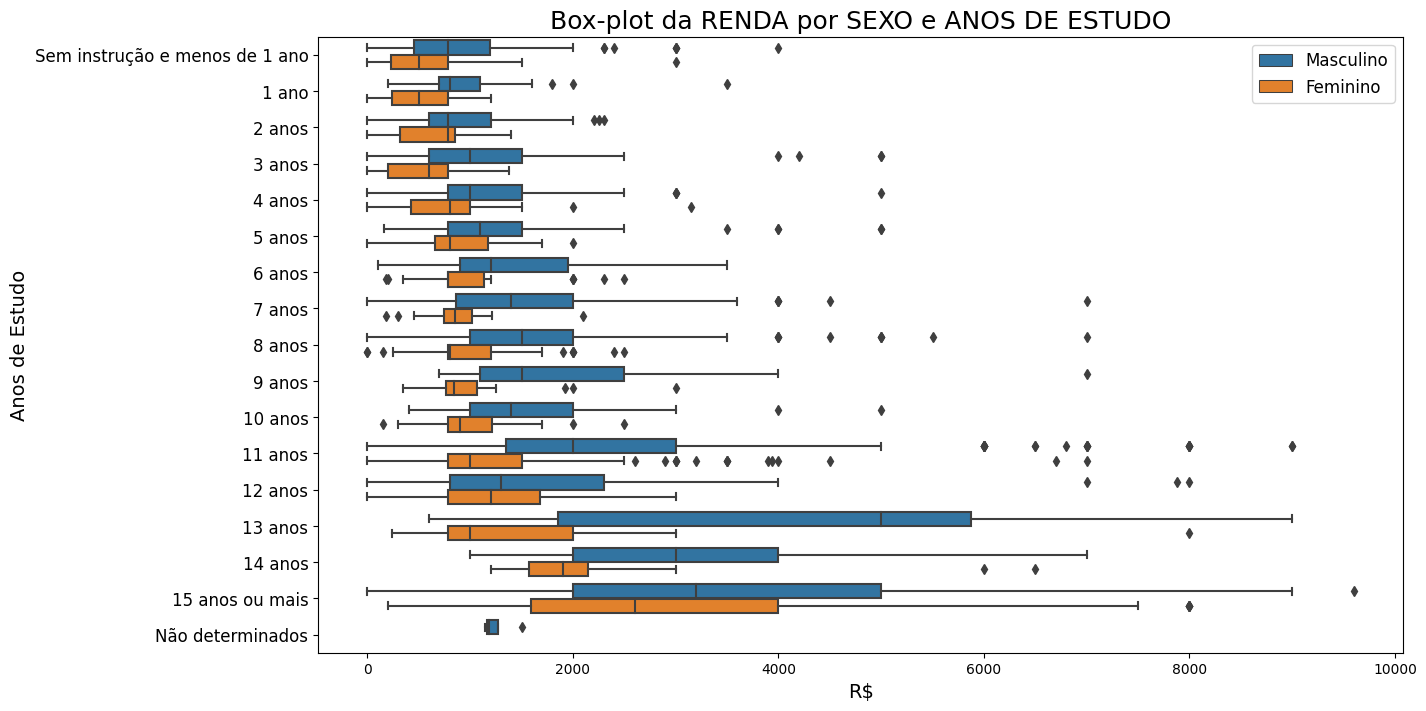

In [131]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=df.query('Renda < 10000 and Idade == 50'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Anos de Estudo', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...

- Homens recebem mais que mulheres idependente dos anos de estudos 
- Quanto mais tempo de estudo melhor são os salarios

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [132]:
renda_por_uf = df.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_por_uf.rename(index = uf, inplace = True)
renda_por_uf.rename(columns = {'mean': 'Média', 'median': 'Mediana', 'max': 'Valor máximo', 'std': 'Desvio padrão'}, inplace = True)

renda_por_uf

Renda                                   
                           Média Mediana Valor máximo Desvio padrão
UF                                                                 
Rondônia             1789.761223  1200.0        50000   2406.161161
Acre                 1506.091782   900.0        30000   2276.233415
Amazonas             1445.130100   900.0        22000   1757.935591
Roraima              1783.588889  1000.0        20000   2079.659238
Pará                 1399.076871   850.0        50000   2053.779555
Amapá                1861.353516  1200.0        15580   2020.688632
Tocantins            1771.094946  1000.0        60000   2934.590741
Maranhão             1019.432009   700.0        30000   1887.816905
Piauí                1074.550784   750.0        40000   2373.355726
Ceará                1255.403692   789.0        25000   1821.963536
Rio Grande do Norte  1344.721480   800.0        15500   1651.805500
Paraíba              1293.370487   788.0        30000   1950.272431
Pernambuco           1527.079319   900.0        50000   2389.622497
Alagoas              1144.552602   788.0        11000   1237.856197
Sergipe              1109.111111   788.0        16000   1478.997878
Bahia                1429.645094   800.0       200000   3507.917248
Minas Gerais         2056.432084  1200.0       100000   3584.721547
Espírito Santo       2026.383852  1274.0       100000   3513.846868
Rio de Janeiro       2496.403168  1400.0       200000   5214.583518
São Paulo            2638.104986  1600.0        80000   3503.777366
Paraná               2493.870753  1500.0       200000   4302.937995
Santa Catarina       2470.854945  1800.0        80000   3137.651112
Rio Grande do Sul    2315.158336  1500.0        35000   2913.335783
Mato Grosso do Sul   2262.604167  1500.0        42000   3031.419122
Mato Grosso          2130.652778  1500.0        35000   2542.630178
Goiás                1994.580794  1500.0        30000   2221.933065
Distrito Federal     4241.954722  2000.0       100000   5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: title={'center': 'Box-plot da RENDA por ESTADOS'}, xlabel='Renda', ylabel='Estados'>

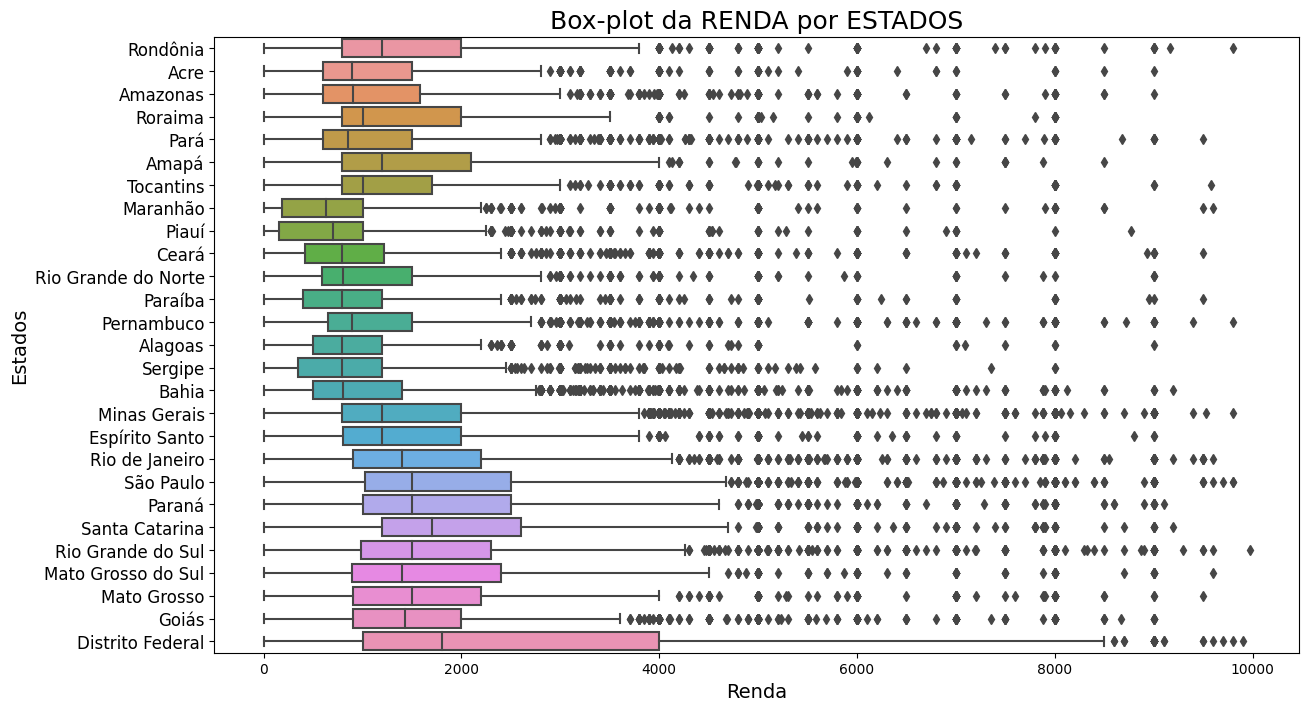

In [133]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data=df.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('Renda', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax


> ### Conclusões

Escreva suas conclusões aqui...

 - A maioria são assimetricos a direita então a média irá sofrer impactos dos altos valores 
 - O Distrito Federal é o conjunto de dados que tem a maior disperção de dados então os outliers estão afetando muito os dados deve ser devido aos altos salarios dos politicos 
 